In [1]:
# These two lines are necessary only if gempy is not installed
import sys, os
sys.path.append("../../..")

# Importing gempy
import gempy as gp

# Embedding matplotlib figures into the notebooks
#%matplotlib inline


# Aux imports
import numpy as np
import pandas as pn
import matplotlib.pyplot as plt
import theano
import qgrid

In [2]:
sp = pn.read_csv('./refold_interface.csv', header=0, names=['X', 'Y', 'Z', 'surface'],
                 usecols=range(4))
sp['surface'] = sp['surface'].astype('str')


In [3]:
ori = pn.read_csv('./refold_normals.csv', header=0, names=['X', 'Y', 'Z', 'G_x', 'G_y', 'G_z'], sep= ' ',
                 usecols=range(6), skipinitialspace=True)
ori['surface'] = '50'
ori.dtypes

X          float64
Y          float64
Z          float64
G_x        float64
G_y        float64
G_z        float64
surface     object
dtype: object

In [4]:
sp.head()

,X,Y,Z,surface
0,-202.6250,278.0,355.261658,50
1,-187.3750,535.0,363.021606,50
2,-63.5000,931.5,372.695435,50
3,-23.8125,984.5,357.881226,50
4,22.1875,294.0,336.429138,50


In [5]:
ori

,X,Y,Z,G_x,G_y,G_z,surface
0,-305.312500,322.000000,288.556061,5.432882e-01,-2.288369e-10,-0.839546,50
1,-280.375000,743.000000,304.802673,5.502025e-01,-6.865996e-09,-0.835031,50
2,-71.687500,832.000000,374.962402,-2.448725e-01,-1.400047e-09,-0.969555,50
3,156.687500,671.000000,211.847687,-9.063796e-01,-5.107705e-09,-0.422464,50
4,174.750000,600.000000,137.668121,-9.909698e-01,5.381935e-10,-0.134085,50
5,153.500000,974.500000,136.787415,9.458837e-01,8.935812e-10,0.324506,50
6,130.937500,662.000000,191.676270,8.674248e-01,1.957214e-09,0.497568,50
7,-152.250000,743.000000,206.672943,4.731825e-01,1.377038e-09,-0.880964,50
8,-104.562535,223.772766,0.131645,-1.048309e-09,-9.912969e-01,NaN,50
9,24.250000,431.000000,187.295227,-4.642146e-01,-5.800857e-09,-0.885723,50


In [6]:
geo_model = gp.create_model('refolded')
gp.init_data(geo_model, [-320,200.,250, 1200,-300,500],[50,50,50], 
    default_values=True)

refolded  2019-06-14 10:40

In [7]:
geo_model.set_surface_points(sp, update_surfaces=True)

In [8]:
geo_model.surface_points.df.head()

,X,Y,Z,X_r,Y_r,Z_r,surface,series,id,order_series
0,-202.6250,278.0,355.261658,0.418677,0.287081,0.659277,50,Default series,1,1
1,-187.3750,535.0,363.021606,0.427847,0.441621,0.663943,50,Default series,1,1
2,-63.5000,931.5,372.695435,0.502336,0.680046,0.669760,50,Default series,1,1
3,-23.8125,984.5,357.881226,0.526201,0.711916,0.660852,50,Default series,1,1
4,22.1875,294.0,336.429138,0.553862,0.296703,0.647952,50,Default series,1,1


In [9]:
for i in range(56):
    geo_model.add_orientations(ori.loc[i, 'X'], ori.loc[i, 'Y'], ori.loc[i, 'Z'], ori.loc[i, 'surface'],
                           pole_vector=ori.loc[i, ['G_x', 'G_y', 'G_z']],
                       )

In [10]:
geo_model.orientations.df.head()

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series
0,-305.3125,322.0,288.556061,0.355764,0.313540,0.619165,0.543288,-2.288369e-10,-0.839546,147.092237,90.000000,1.0,50,Default series,1.0,1.0
1,-280.3750,743.0,304.802673,0.370759,0.566697,0.628935,0.550202,-6.865996e-09,-0.835031,146.619094,90.000001,1.0,50,Default series,1.0,1.0
2,-71.6875,832.0,374.962402,0.496248,0.620214,0.671123,-0.244872,-1.400047e-09,-0.969555,165.825708,270.000000,1.0,50,Default series,1.0,1.0
3,156.6875,671.0,211.847687,0.633575,0.523401,0.573039,-0.906380,-5.107705e-09,-0.422464,114.990255,270.000000,1.0,50,Default series,1.0,1.0
4,174.7500,600.0,137.668121,0.644436,0.480707,0.528433,-0.990970,5.381935e-10,-0.134085,97.705724,270.000000,1.0,50,Default series,1.0,1.0


In [11]:
geo_model.surfaces

,surface,series,order_surfaces,isBasement,color,id
0,50,Default series,1,False,#015482,1
1,0,Default series,2,False,#9f0052,2
2,100,Default series,3,True,#ffbe00,3


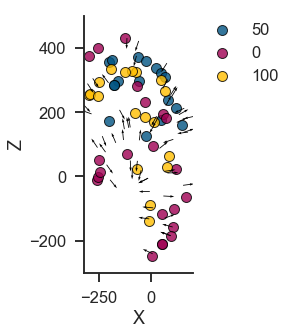

In [12]:
gp.plot.plot_data(geo_model)

In [13]:
gp.set_interpolation_data(geo_model, theano_optimizer='fast_run')

Compiling theano function...


/anaconda3/envs/gempy/lib/python3.7/site-packages/theano/gof/cc.py:968: UserWarning: Your g++ compiler fails to compile OpenMP code. We know this happen with some version of the EPD mingw compiler and LLVM compiler on Mac OS X. We disable openmp everywhere in Theano. To remove this warning set the theano flags `openmp` to False.
  ret += x.c_compile_args()


Compilation Done!


In [14]:
# geo_model.grid.set_regular_grid([-10,200.,-20, 75,-100,20],[100,100,100])

In [15]:
geo_model.rescaling.set_rescaled_grid()
geo_model.update_to_interpolator()

In [29]:
sol = gp.compute_model(geo_model, set_solutions=False)

In [30]:
sol

[array([[1.        , 1.        , 1.        , ..., 3.49964736, 3.49964736,
         3.49964736]]),
 array([[[1.        , 1.        , 1.        , ..., 3.49964736,
          3.49964736, 3.49964736]]]),
 array([ 3.94669222e-03,  3.54208721e-03, -2.09174316e-03, -1.85727505e-02,
        -1.27539713e-02,  3.61204075e-03,  2.46633378e-02,  1.25376744e-02,
        -6.54462325e-03, -9.12162875e-03, -7.72710896e-03,  2.92662244e-03,
         1.25172591e-02,  1.10121591e-02,  3.01111290e-03, -2.40033068e-03,
        -9.66505585e-03, -1.20690684e-04, -2.61451913e-03, -4.02881666e-03,
        -4.46283437e-03,  4.46674609e-03,  1.44003245e-02,  5.97783782e-03,
        -2.55816195e-02, -1.37714978e-02, -5.64314697e-03, -6.93732653e-03,
         1.74264439e-02, -2.99982907e-03,  2.30414323e-03, -1.12183677e-02,
        -1.04836419e-02,  1.19728198e-02, -7.09739957e-03,  1.08930950e-02,
         2.03848432e-03,  7.70404446e-03,  2.12917097e-03, -1.20484935e-02,
        -1.71051834e-02,  9.55846529e-03,

In [34]:
geo_model.solutions.vertices[0]

array([[-316.16427746,  250.        , -140.        ],
       [-309.6       ,  250.        , -143.66532898],
       [-309.6       ,  258.71826205, -140.        ],
       ...,
       [ 189.6       , 1151.60270691,  308.        ],
       [ 189.6       , 1162.        ,  304.63226318],
       [ 189.6       , 1181.        ,  298.0246582 ]])

In [ ]:
geo_model.solutions.vertices[0]

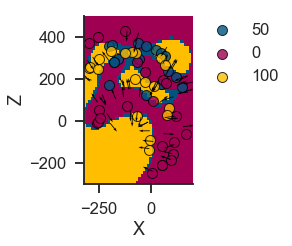

In [17]:
gp.plot.plot_section(geo_model, show_data=True)

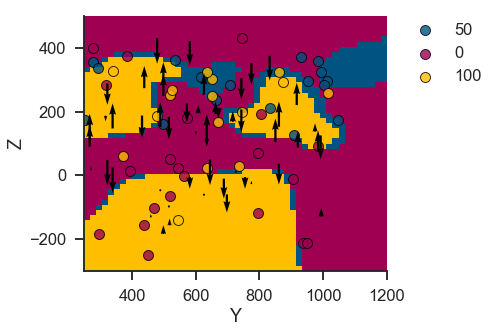

In [18]:
gp.plot.plot_section(geo_model, direction='x', show_data=True)

In [19]:
vtk_obj = gp.plot.plot_3D(geo_model)

KeyError: "['recalculate_orientations'] not in index"

KeyError: "['recalculate_orientations'] not in index"

KeyError: "['recalculate_orientations'] not in index"

KeyError: "['recalculate_orientations'] not in index"

KeyError: "['recalculate_orientations'] not in index"

closing vtk


In [20]:

geo_model.interpolator.theano_graph.a_T.get_value()

array(0.80964507)

In [21]:
vtk_obj.resume()

AttributeError: 'GemPyvtkInteract' object has no attribute 'interactor'

In [53]:
geo_model.orientations

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series
0,0.0,0.0,0.0,0.250100,0.419455,0.596874,1.000000e-12,1.000000e-12,1.000000e+00,0.0,270.0,1.0,surface1,Default series,1.0,1.0
1,10.0,0.2,0.0,0.282358,0.420100,0.596874,1.000000e-12,1.000000e-12,1.000000e+00,0.0,270.0,1.0,surface1,Default series,1.0,1.0
2,150.0,50.0,-60.0,0.733971,0.580745,0.403326,-1.000000e+00,9.998163e-13,1.000061e-12,90.0,270.0,1.0,surface1,Default series,1.0,1.0


In [57]:
geo_model.modify_orientations(2, polarity=.1)

,X,Y,Z,X_r,Y_r,Z_r,G_x,G_y,G_z,dip,azimuth,polarity,surface,series,id,order_series
0,0.0,0.0,0.0,0.250100,0.419455,0.596874,1.000000e-12,1.000000e-12,1.000000e+00,0.0,270.0,1.0,surface1,Default series,1.0,1.0
1,10.0,0.2,0.0,0.282358,0.420100,0.596874,1.000000e-12,1.000000e-12,1.000000e+00,0.0,270.0,1.0,surface1,Default series,1.0,1.0
2,150.0,50.0,-60.0,0.733971,0.580745,0.403326,-1.000000e-01,9.999816e-13,1.000006e-12,90.0,270.0,0.1,surface1,Default series,1.0,1.0


In [103]:

geo_model.interpolator.theano_graph.a_T.set_value(.08)
gp.compute_model(geo_model)


Lithology ids 
  [1. 1. 1. ... 4. 4. 4.] 

In [104]:
vtk_obj.render_surfaces()